# 几何（Geometry）

本节课程会把你稍微带回到高中数学的内容：（欧几里得）几何学。  
不过希望这一次会更有趣一些，因为在（地理）空间 IT / GIS 领域中，我们通常处理的是
现实世界中的对象（道路、湖泊、森林等），这些对象会被抽象为几何体来表示。

> *几何学（Geometry，源自古希腊语 γεωμετρία；geo- “土地”，-metron “测量”）*  
> *是数学的一个分支，关注图形的形状、大小、相对位置以及空间的性质。*  
> 来源：[Wikipedia](https://en.wikipedia.org/wiki/Geometry)

在地理空间领域中，我们主要处理的是 **几何（Geometries）**（至少在矢量数据中如此），  
在这里可以应用欧几里得几何数学。  
矢量数据通过坐标进行编码，通常是 X、Y（有时也包括用于三维的 Z），
用来表示 **三种基本的几何类型**：

* **点（Points）**
* **线（Lines）**（又称 LineStrings、Curves）
* **面（Polygons）**（又称 Surfaces）

这些几何类型可用于表示如下现象：

* 城市中心、兴趣点（PoIs）等（点）
* 道路、河流等（线）
* 森林、湖泊、国家等（面）

为了让事情稍微复杂一些，这三种基本几何类型通常还会被扩展，
甚至组合成被称为 **“Multi（多重）几何”** 的集合：

* 点的集合称为 *MultiPoint*
* 线的集合称为 *MultiLine*（又称 *MultiLineString*）
* 面的集合称为 *MultiPolygon*（又称 *MultiSurface*）

这些集合在对某些类型的要素进行建模时非常有用。  
例如，一个国家的边界集合通常表示为 *MultiLine(String)*  
（可以想象英国的边界……提示：北爱尔兰）。  
像希腊、荷兰或加拿大这样的国家，通常表示为 *MultiPolygon*  
（可以理解为：大陆 + 岛屿）。  
一个 Polygon 甚至可以包含 **孔洞（holes）**（可以联想到 *飞地*）。

在本课程中，我们将主要使用 [Shapely](https://shapely.readthedocs.io)，
这是一个用于几何集合论分析与操作的 Python 包——没错，就是用来处理几何的！

Shapely 提供了一个空间数据模型（见下图），
它基本实现了上述几何类型及其变体，
以及对这些几何进行的（数学）操作。

![Spatial data model](images/spatialdatamodel.png)  
*可在 Python 中使用的基础几何对象 —— 基于* [Shapely](https://shapely.readthedocs.io/en/latest/manual.html) *包*

## 背景阅读（Background reading）

* https://en.wikipedia.org/wiki/Geometry
* Shapely 用户手册：https://shapely.readthedocs.io/en/stable/manual.html
* https://automating-gis-processes.github.io/CSC/notebooks/L1/geometric-objects.html
* 空间关系模型：[九交模型（Dimensionally Extended nine-Intersection Model，DE-9IM）](https://en.wikipedia.org/wiki/DE-9IM)


## Shapely 基础（Shapely basics）

Shapely 关注的是**几何（Geometries）**本身，而不一定局限于地理空间几何。  
因此，我们可以从众所周知的欧几里得 X、Y 平面出发，来介绍 Shapely 的基础概念。

### Shapely 点（Shapely Points）

In [1]:
from shapely.geometry import Point

point1 = Point(0.0, 0.0)

In [2]:
point1.area

0.0

In [3]:
point1.length

0.0

In [4]:
# Show Well-Known Text (WKT) representation
point1.wkt

'POINT (0 0)'

In [5]:
point2 = Point(3, 4)

# Pythagoras Theorem here!
point1.distance(point2)

5.0

### Shapely 线（Shapely LineStrings）


In [6]:
from shapely.geometry import LineString
line = LineString([(0, 0), (3, 4)])

In [7]:
line.area

0.0

In [8]:
line.length

5.0

### Shapely 多边形（Shapely Polygons）


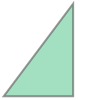

In [9]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (3, 0), (3, 4)])
polygon

In [10]:
# Convert coordinates to list
# polygon.coords does not exist!
list(polygon.exterior.coords)

[(0.0, 0.0), (3.0, 0.0), (3.0, 4.0), (0.0, 0.0)]

In [11]:
polygon.area

6.0

In [12]:
polygon.length

12.0

In [13]:
# Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.
polygon.bounds

(0.0, 0.0, 3.0, 4.0)

### 关于 Shapely 的更多内容（More on Shapely）

[Shapely](https://shapely.readthedocs.io/en/stable/manual.html) 是一个 Python 包，
用于对平面要素进行**集合论分析与操作**。  
它通过 Python 的 ctypes 模块，调用了一个广泛使用、部署成熟的几何库
[GEOS library](https://trac.osgeo.org/geos) 中的函数。

GEOS 是 [JTS Topology Suite](https://locationtech.github.io/jts)（JTS）的一个移植版本，
同时也是 PostgreSQL 关系型数据库管理系统中 PostGIS 空间扩展的几何引擎，
并被包括 GDAL/OGR 在内的许多其他项目所使用。

JTS 和 GEOS 的设计在很大程度上遵循了
Open Geospatial Consortium（OGC）与 ISO 19125 标准中的
*Simple Features（Access）Specification*
（参考：[Wikipedia](https://en.wikipedia.org/wiki/Simple_Features)）。
Shapely 在很大程度上遵循了同一套标准类与操作。
因此，Shapely 深深植根于地理信息系统（GIS）领域的约定与规范之中，
但同时也致力于对从事非传统问题的程序员同样具有实用价值。

摘自 [Shapely 用户手册](https://shapely.readthedocs.io/en/stable/manual.html)：

> **关系（Relationships）**  
> 空间数据模型伴随着一组用于描述几何对象之间关系的自然语言术语——  
> *contains（包含）、intersects（相交）、overlaps（重叠）、touches（接触）* 等，  
> 以及一个用于理解这些关系的理论框架，
> 即通过其组成点集之间的 3×3 相互交集矩阵来描述的
> [DE-9IM](https://en.wikipedia.org/wiki/DE-9IM)。

> **操作（Operations）**  
> 遵循 JTS 的技术规范……  
> 区分了构造型操作
> （*buffer（缓冲区）、convex hull（凸包）*）
> 与集合论操作
> （*intersection（相交）、union（并集）* 等）。

因此，可以将 Shapely 理解为提供了一个 **空间（类）模型（Spatial (Class) Model）**，
并围绕该模型提供了一系列函数 / 操作用于：

* **空间关系（Spatial Relationships）** —— *contains, intersects, overlaps, touches* 等
* **空间操作（Spatial Operations）** —— *buffer, convex hull, intersection, union* 等


### 使用 Shapely 探索空间关系（Exploring spatial relationships with Shapely）

几何数学中的一个基础概念是 *空间关系（Spatial Relationships）*。  
请参见下方的简化示意图。更多内容可参考 [Wikipedia](https://en.wikipedia.org/wiki/Spatial_relation)。

![(Topological) Spatial Relationships](images/spatialrelations.png)  
*拓扑空间关系示例 —— [By Krauss - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=21299138)*

如果你希望进一步深入理论背景，可以查阅
[维度扩展九交模型（Dimensionally Extended nine-Intersection Model，DE-9IM）](https://en.wikipedia.org/wiki/DE-9IM)。

在我们稍后将要探讨的 *(地理)空间分析（(Geo)Spatial Analysis）* 中，
空间关系往往处于核心地位（参见 [06-data-analysis.ipynb](06-data-analysis.ipynb)）。

Shapely 对 *(拓扑)空间关系（(Topological) Spatial Relationships）* 提供了非常完善的支持。
借助 Shapely，我们可以解决如下任务与问题：

* 荷兰的面积是多少？
* 阿姆斯特丹与雅典之间的距离是多少？
* 多瑙河有多长？
* 两个要素是否发生重叠或相交？多瑙河是否流经罗马尼亚？
* 两个要素的公共区域是什么样的？
* 围绕某个要素创建一个缓冲区。
* ……

因此，在诉诸更高级的分析工具之前，
仅使用 Shapely 就已经能够解决一些非常有力的 GIS 问题！
作为热身，让我们在这里先探索一些 Shapely 的空间关系函数。

首先是一些布尔运算（**空间关系**）：


In [14]:
from shapely.geometry import LineString, Polygon

ls = LineString([(0, 0), (1, 1)])
ls.contains(Point(0.5, 0.5))

True

In [15]:
ls2 = LineString([(0, 1), (1, 0)])
ls.crosses(ls2)

True

In [16]:
polygon = Polygon([(0, 0), (3, 0), (3, 4)])
polygon.contains(Point(0.5, 0.5))

True

#### 分析方法（Analysis methods）
接下来是一些会返回新的几何对象的分析方法。

In [17]:
ls = LineString([(0, 0), (1, 1)])
print(ls.centroid)

POINT (0.5 0.5)


In [18]:
ls2 = LineString([(0, 1), (1, 0)])
print(ls.intersection(ls2))

POINT (0.5 0.5)


In [19]:
polygon = Polygon([(1, 1), (2,1), (2,2), (1,2)])
ls3 = LineString([(0, 0), (3,3)])
print(polygon.intersection(ls3))

LINESTRING (1 1, 2 2)


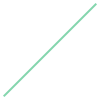

In [20]:
ls = LineString([(0, 0), (1, 1)])
ls

POLYGON ((0.8585786437626906 1.1414213562373094, 0.8731213431672709 1.1546020906725474, 0.8888859533960796 1.1662939224605091, 0.9057206526348005 1.176384252869671, 0.9234633135269821 1.1847759065022574, 0.9419430645491076 1.1913880671464419, 0.9609819355967744 1.196157056080646, 0.9803965719340879 1.1990369453344394, 1 1.2, 1.019603428065912 1.1990369453344394, 1.0390180644032256 1.196157056080646, 1.0580569354508924 1.1913880671464419, 1.076536686473018 1.1847759065022574, 1.0942793473651995 1.176384252869671, 1.1111140466039204 1.1662939224605091, 1.1268786568327291 1.1546020906725474, 1.1414213562373094 1.1414213562373094, 1.1546020906725474 1.1268786568327291, 1.1662939224605091 1.1111140466039204, 1.176384252869671 1.0942793473651995, 1.1847759065022574 1.076536686473018, 1.1913880671464419 1.0580569354508924, 1.196157056080646 1.0390180644032256, 1.1990369453344394 1.019603428065912, 1.2 1, 1.1990369453344394 0.9803965719340879, 1.196157056080646 0.9609819355967744, 1.1913880671

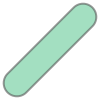

In [21]:
# Place a buffer around the LineString
poly1 = ls.buffer(0.2)
print(poly1)
poly1

我们将在 [数据分析课程（Data Analysis Lesson）](06-data-analysis.ipynb) 中再次回到 Shapely，进一步介绍更多的空间关系与空间操作。

### 关于投影与 Shapely（About projections and Shapely）

> *Shapely 不支持坐标系转换。*  
> *对两个或多个要素进行的所有操作，都假定这些要素存在于同一个笛卡尔平面中。*  
> 来源：https://shapely.readthedocs.io/en/stable/manual.html#coordinate-systems

在 Shapely 中，距离指的是欧几里得距离，
也就是例如在一个平面上两个点之间的线性距离（勾股定理！），
而**不是**球面上两点之间的
[大圆距离（Great-circle distance）](https://en.wikipedia.org/wiki/Great-circle_distance)。

如果你使用的是 WGS84（EPSG:4326）坐标系的数据，
也就是以度为单位的“纬度 / 经度”（可以理解为 GPS 坐标），
那么 Shapely 中诸如 `length` 和 `area` 这样的计算结果，
将**不会**得到你所期望的数值。

在这种情况下，我们有几种选择。另可参考
[这条 Stack Exchange 讨论](https://gis.stackexchange.com/questions/80881/what-is-unit-of-shapely-length-attribute)：

* 临时方案（add-hoc）：  
  使用 [Haversine 公式](https://en.wikipedia.org/wiki/Haversine_formula)
  或 [余弦定理（球面）](https://en.wikipedia.org/wiki/Spherical_law_of_cosines)
  等函数，直接计算
  [大圆距离（Great Circle Distance）](https://en.wikipedia.org/wiki/Great-circle_distance)。

* 将源数据重新投影到一个以“米”为单位的投影坐标系中，
  例如 Web Mercator（EPSG:3857，全球范围内使用，
  被 Google、OSM 等用于地图瓦片），
  可借助 GDAL 或 GeoPandas（内部使用 `pyproj`）完成。

* 直接使用 `pyproj` 来应用合适的投影与计算公式。

下面通过一个示例来进行说明：


In [22]:
from shapely.geometry import Point

point1 = Point(50.67, 4.62)
point2 = Point(51.67, 4.64)

# Shapely Distance in degrees
point1.distance(point2)

1.000199980003999

使用 `pyproj` 根据 WGS84 计算真实距离（单位：公里）：

In [23]:
import pyproj
geod = pyproj.Geod(ellps='WGS84')
angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

# "Real" Distance in km
distance / 1000.0   

110.9806766471818

---
[<- Introduction](01-introduction.ipynb) | [坐标参考系统（Coordinate Reference Systems） ->](03-coordinate-reference-systems.ipynb)